# Human AI Interaction HW2

Risk assessment tool has been commonly used in criminal justice systems. In the United States, judges set
bail and decide pre-trial detention based on their assessment of the risk that a released defendant would fail to
appear at trial or cause harm to the public. While actuarial risk assessment is not new in this domain, there
is increasing support for the use of learned risk scores to guide human judges in their decisions. However, there are concerns that such scores can perpetuate inequalities found in historical
data, and systematically harm historically disadvantaged groups.

In this homework, we will look into
an [investigation](https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm) carried out by ProPublica of a proprietary risk score, called the COMPAS score. These scores are intended to assess the risk that a defendant will re-offend, a task often called
recidivism prediction.

# Loading basic libraries
We will begin by importing these libraries. 
* [matplotlib](https://matplotlib.org/3.1.1/contents.html)
* [numpy](https://docs.scipy.org/doc/)
* [pandas](https://pandas.pydata.org/pandas-docs/stable/)

You are encouraged to read the documentation of these libraries.


In [75]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pandas as pd

%matplotlib inline


# Imports and helper functions used for tests. 
import hashlib
import sys
def get_hash(num):
    return hashlib.md5(str(num).encode()).hexdigest()

# Dataset
As a result of a public records request in Broward
Country, Florida, ProPublica released their dataset, which is available at https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv. 

Here, we will download the data from the link above and apply this filter.

In [76]:
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
df = pd.read_csv(data_url)

## Pre-processing
Following ProPublica’s analysis, we will filter out rows where `days_b_screening_arrest` is over $30$ or under $−30$.

In [77]:
df = df.query('days_b_screening_arrest <= 30 & days_b_screening_arrest >= -30')

# Part 1 Protected Groups

We will filter the data for only two races.

In [78]:
races = ['African-American', 'Caucasian']
df = df[df['race'].isin(races)]
df.head(5)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
6,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,0,6,0,0,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,14002304CF10A,2014-02-18,NaN,1.0,F,Possession Burglary Tools,1,14004485CF10A,(F2),0.0,2014-03-31,Poss of Firearm by Convic Felo,2014-03-31,2014-04-18,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,6,Medium,2014-02-19,Risk of Violence,2,Low,2014-02-19,2014-03-31,2014-04-18,14,5,40,1,1
8,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,0,1,0,0,0,-1.0,2014-03-15 05:35:34,2014-03-18 04:28:46,14004524MM10A,2014-03-15,NaN,1.0,M,Battery,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2014-03-16,Risk of Violence,1,Low,2014-03-16,2014-03-15,2014-03-18,0,2,747,0,0
10,14,benjamin franc,benjamin,franc,2013-11-26,Male,1988-06-01,27,25 - 45,Caucasian,0,4,0,0,0,-1.0,2013-11-25 06:31:06,2013-11-26 08:26:57,13016402CF10A,2013-11-25,NaN,1.0,F,"Poss 3,4 MDMA (Ecstasy)",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-11-26,Risk of Violence,4,Low,2013-11-26,2013-11-25,2013-11-26,0,0,857,0,0


## Question 1.A: How many rows are in the `African-American` group? How many in the `Caucasian` group?
_Double click to write your answer question here. Show your work in code below if applicable._

# Part 2 Predictions by thresholding the scores

Suppose we make predictions by setting a threshold on the COMPAS risk scores. That is we predict an individual will re-offend (recidivate) if their score is greater than equal the threshold.

The dataset does not contain the original COMPAS risk scores. Instead, the column `decile_score` provides the decile of the COMPAS risk score (similar to a percentile, but out of 10). We will refer to this decile value (a number between 1 and 10) as our COMPAS "decile score". 

## Grouping the examples by `race` and `decile_score`.

We will first create a dataframe that groups the individuals according to their (`race`, `decile_score`) pairs.

In [79]:
groups = df.groupby(['race', 'decile_score'], as_index=False)
groups.size()

race              decile_score
African-American  1               365
                  2               346
                  3               298
                  4               337
                  5               323
                  6               318
                  7               343
                  8               301
                  9               317
                  10              227
Caucasian         1               605
                  2               321
                  3               238
                  4               243
                  5               200
                  6               160
                  7               113
                  8                96
                  9                77
                  10               50
dtype: int64

## Question 2.A. For each `race`/`decile_score` pair, implement the following:
1. `total_count_fn` that returns the total number of examples in the dataframe. 
2. `recid_count_fn` that returns the number of cases where recidivism occurred within two years,
2. `non_recid_count_fn` that returns the number of cases where recidivism did not occur, and 

We have already provided a skeleton for each function and a test to help you check for correctness.

Note: the column `two_year_recid` is a column that takes value 1 if recidivism occurred within two years, and 0 if recidivism did not occur.

In [80]:
# Compute the total number of examples in the dataset.
def total_count_fn(df_recid_column):
    """Computes the total number of examples in the dataset.
    
    Args: 
      df_recid_column: dataframe column where each row takes value 1 if 
        recidivism occured, and 0 if recidivism did not occur.
    
    Returns: 
      The total number of rows in the dataset.
    """
    total_count = len(df_recid_column) # FILL IN
    return total_count 

print("Total number of examples in the dataset:", total_count_fn(df['two_year_recid']))

# Test for correctness of this function.
assert(get_hash(total_count_fn(df['two_year_recid'])) == '82f292a22966b857d968fb578ccbead9')
print("Test passed!")

Total number of examples in the dataset: 5278
Test passed!


In [88]:
# Compute the total number of examples in which recidivism occurred within two years.
def recid_count_fn(df_recid_column):
    """Computes the total number of examples in which recidivism occurred in two years.
    
    Args: 
      df_recid_column: dataframe column where each row takes value 1 if 
        recidivism occured, and 0 if recidivism did not occur.
    
    Returns: 
      The total number of rows in which recidivism occurred in two years.
    """
    recid_count = np.sum(df_recid_column) # FILL IN
    return recid_count

print("Total number of examples of recidivism in the dataset:", recid_count_fn(df['two_year_recid']))

# Test for correctness of this function.
assert(get_hash(recid_count_fn(df['two_year_recid'])) == '2c6ae45a3e88aee548c0714fad7f8269')
print("Test passed!")


# Compute the total number of examples in which recidivism did not occur within two years.
def non_recid_count_fn(df_recid_column):
    """Computes the total number of examples in which recidivism did not occur.
    
    Args: 
      df_recid_column: dataframe column where each row takes value 1 if 
        recidivism occured, and 0 if recidivism did not occur.
    
    Returns: 
      The total number of rows in which recidivism did not occur.
    """
    non_recid_count = np.size(df_recid_column) - np.sum(df_recid_column) # FILL IN
    return non_recid_count 

print("Total number of examples of non-recidivism in the dataset:", non_recid_count_fn(df['two_year_recid']))

# Test for correctness of this function.
assert(get_hash(non_recid_count_fn(df['two_year_recid'])) == 'a7f592cef8b130a6967a90617db5681b')
print("Test passed!")

Total number of examples of recidivism in the dataset: 2483
2c6ae45a3e88aee548c0714fad7f8269
Test passed!
Total number of examples of non-recidivism in the dataset: 2795
Test passed!


### Create the `summary` dataframe
We now create a dataframe called `summary`, where each row contains summary statistics for each `race`/`decile_score` pair, including the total number of examples with that race and decile_score (`total_count`), the number of examples with that race and decile_score where recidivism occurred (`recid_count`), and the number of examples with that race and decile_score where recidivism did not occur (`non_recid_count`).

The `.agg` function below applies the functions you just wrote over a column of the dataframe corresponding to each `race`/`decile_score` pair. 
Each function will be computed on the column `two_year_recid` for each `race`/`decile_score` pair.

In [82]:
summary = groups['two_year_recid'].agg({'recid_count': recid_count_fn, 'non_recid_count': non_recid_count_fn, 'total_count': total_count_fn})
summary

,race,decile_score,recid_count,non_recid_count,total_count
0,African-American,1,85,280,365
1,African-American,2,105,241,346
2,African-American,3,125,173,298
3,African-American,4,158,179,337
4,African-American,5,158,165,323
5,African-American,6,187,131,318
6,African-American,7,209,134,343
7,African-American,8,215,86,301
8,African-American,9,229,88,317
9,African-American,10,190,37,227


## Question 2.B. Explore different decision thresholds.

For each race in the `summary` dataframe, we will investigate outcome when we set the decision threshold to be each `decile_score`.

Specifically, we will iterate through the `decile_scores` in the `summary` dataframe, and for each `decile_score`, we will compute the number of true positives, true negatives, false positives, and false negatives under the assumption that the decision threshold occurs just below this `decile_score`. For example, in the row of the `summary` dataframe corresponding to a `decile_score` of 5, we will compute the number of true positives under the assumption that every example receiving a `decile_score` of 5 or above is classified as positive.

Your task is to fill in the missing parts for the four functions below:
1. `get_TN_column`
2. `get_FP_column`
3. `get_FN_column`

We have provided an example on how to implement `get_TP_column`.


In [100]:
# Compute the number of true positives assuming the decision threshold 
# occurs just below each decile_score.
# If you'd like, you may also restructure the loop inside this function 
# (but do not change the function definition).
def get_TP_column(summary_df):
    """Returns an array of the number of true positives for each decile_score threshold.
    
    Args:
      summary_df: dataframe containing columns for 'decile_score', 'recid_count', 
        'non_recid_count', and 'total_count' for a single race.
    
    Returns:
      An array of the number of true positives for each decile_score (under the assumption that every example
      receiving that row's decile_score or above is classified as positive -- aka, the decision threshold occurs
      just below the row's decile score.)
    """
    TPs = []
    for threshold in summary_df['decile_score']:
        true_positives = sum(summary_df[summary_df['decile_score'] 
                                        >= threshold]['recid_count'])# Compute the number of true positives for this threshold. 
                                                                     # Iterate through the summary_df, compare the threshold to 'decile_score', and add up the 'recid_count' column.
        TPs.append(true_positives)
    return np.array(TPs, dtype=np.int32)

print("TP column for Caucasian:", get_TP_column(summary[summary['race']=='Caucasian']))

assert(get_hash(get_TP_column(summary[summary['race']=='Caucasian'])) == 'fdca79d31fe11760d9c6a06a4f8cb660')
print("Test passed!")

TP column for Caucasian: [822 694 594 512 414 323 230 162  90  35]
Test passed!


In [92]:
# Compute the number of true negatives assuming the decision threshold 
# occurs just below each decile_score.
def get_TN_column(summary_df):
    """Returns an array of the number of true negatives for each decile_score threshold.
    
    Args:
      summary_df: dataframe containing columns for 'decile_score', 'recid_count', 
        'non_recid_count', and 'total_count' for a given race.
    
    Returns:
      An array of the number of true negatives for each decile_score (under the assumption that every example
      receiving that row's decile_score or above is classified as positive -- aka, the decision threshold occurs
      just below the row's decile score.)
    """
    TNs = []
    for threshold in summary_df['decile_score']:
        true_negatives = sum(summary_df[summary_df['decile_score'] 
                                        < threshold]['non_recid_count'])# FILL IN: compute the number of true negatives for this threshold.  
        TNs.append(true_negatives)
    return np.array(TNs, dtype=np.int32)

print("TN column for Caucasian:", get_TN_column(summary[summary['race']=='Caucasian']))

assert(get_hash(get_TN_column(summary[summary['race']=='Caucasian']))  == '8175ee4854079441b234ca97e7f9a1c5')
print("Test passed!")

TN column for Caucasian: [   0  477  698  854  999 1108 1175 1220 1244 1266]
Test passed!


In [94]:
# Compute the number of false positives assuming the decision threshold 
# occurs just below each decile_score.
def get_FP_column(summary_df):
    """Returns an array of the number of false positives for each decile_score threshold.
    
    Args:
      summary_df: dataframe containing columns for 'decile_score', 'recid_count', 
        'non_recid_count', and 'total_count' for a given race.
    
    Returns:
      An array of the number of false positives for each decile_score (under the assumption that every example
      receiving that row's decile_score or above is classified as positive -- aka, the decision threshold occurs
      just below the row's decile score.)
    """
    FPs = []
    for threshold in summary_df['decile_score']:
        false_positives = sum(summary_df[summary_df['decile_score'] 
                                         >= threshold]['non_recid_count'])# FILL IN: compute the number of false positives for this threshold.           
        FPs.append(false_positives)
    return np.array(FPs, dtype=np.int32)

print("FP column for Caucasian:", get_FP_column(summary[summary['race']=='Caucasian']))

assert(get_hash(get_FP_column(summary[summary['race']=='Caucasian']))  == 'bc995fd0c02ad77eb6924ea48482f9ed')
print("Test passed!")


FP column for Caucasian: [1281  804  583  427  282  173  106   61   37   15]
Test passed!


In [95]:
# Compute the number of false negatives assuming the decision threshold 
# occurs just below each decile_score.
def get_FN_column(summary_df):
    """Returns an array of the number of false negatives for each decile_score threshold.
    
    Args:
      summary_df: dataframe containing columns for 'decile_score', 'recid_count', 
        'non_recid_count', and 'total_count' for a given race.
    
    Returns:
      An array of the number of false negatives for each decile_score (under the assumption that every example
      receiving that row's decile_score or above is classified as positive -- aka, the decision threshold occurs
      just below the row's decile score.)
    """
    FNs = []
    for threshold in summary_df['decile_score']:
        false_negatives = sum(summary_df[summary_df['decile_score'] 
                                         < threshold]['recid_count']) # FILL IN: compute the number of false negatives for this threshold. 
        FNs.append(false_negatives)
    return np.array(FNs, dtype=np.int32)

print("FN column for Caucasian:", get_FN_column(summary[summary['race']=='Caucasian']))

assert(get_hash(get_FN_column(summary[summary['race']=='Caucasian']))  == 'f680125060a0bfb18a1447c6658fdfb8')
print("Test passed!")


FN column for Caucasian: [  0 128 228 310 408 499 592 660 732 787]
Test passed!


In [101]:
# Note: nothing you need to do in this cell, just run it to assign the columns you created to the summary dataframe.
# Add in the TP, TN, FP, FN information for each race.
for race in races:
    rows = summary['race'] == race
    summary.loc[rows, 'TP'] = get_TP_column(summary[rows])
    summary.loc[rows, 'TN'] = get_TN_column(summary[rows])
    summary.loc[rows, 'FP'] = get_FP_column(summary[rows])
    summary.loc[rows, 'FN'] = get_FN_column(summary[rows])
summary.fillna(0 , inplace=True)
summary

,race,decile_score,recid_count,non_recid_count,total_count,TP,TN,FP,FN
0,African-American,1,85,280,365,1661.0,0.0,1514.0,0.0
1,African-American,2,105,241,346,1576.0,280.0,1234.0,85.0
2,African-American,3,125,173,298,1471.0,521.0,993.0,190.0
3,African-American,4,158,179,337,1346.0,694.0,820.0,315.0
4,African-American,5,158,165,323,1188.0,873.0,641.0,473.0
5,African-American,6,187,131,318,1030.0,1038.0,476.0,631.0
6,African-American,7,209,134,343,843.0,1169.0,345.0,818.0
7,African-American,8,215,86,301,634.0,1303.0,211.0,1027.0
8,African-American,9,229,88,317,419.0,1389.0,125.0,1242.0
9,African-American,10,190,37,227,190.0,1477.0,37.0,1471.0


## Question 2.C. Computer Disparity.

Here you will first write code to compute the the true positive rate (TPR), false positive rate (FPR), and positive predictive value (PPV) metrics. PPV is also known as precision, and is defined as the number of true positives divided by the number of examples classified as positive. 

We have provided an example on how to compute TPR. Your task is to fill in the details for FPR and PPV.


In [102]:
# Sample code: compute the TPR for each race using other columns in summary.
summary['TPR'] = summary['TP'] / (summary['TP'] + summary['FN']) 

assert(get_hash(np.array(summary['TPR'].round(1), dtype=np.float32)) == '4e6755717caed5f4d6a62fc6fe8abbee')
print("Test passed!")

Test passed!


In [105]:
# FILL IN: compute the FPR for each race using other columns in summary.
summary['FPR'] = summary['FP'] / (summary['FP'] + summary['TN']) # FILL IN: fill in the columns to use.

assert(get_hash(np.array(summary['FPR'].round(1), dtype=np.float32)) == 'e0eba6216d5fada1d6eabbfe568c527b')
print("Test passed!")

Test passed!


In [112]:
# FILL IN: compute the PPV for each race using other columns in summary.
summary['PPV'] = summary['TP'] / (summary['TP'] + summary['FP']) # FILL IN: fill in the columns to use.

assert(get_hash(np.array(summary['PPV'].round(1), dtype=np.float32))  == '6db5b24b7cd46af910f6a781eee40134')
print("Test passed!")

Test passed!


Next, now suppose we use the same threshold for both groups. Answer the following:
1. What is the threshold that leads to the largest disparity in FPR?
2. What is the threshold that leads to the largest disparity in PPV?

_Double click to write your answer question here. Show your work in code below if applicable._

## Question 2.D. ROC
First, we will plot the ROC curve for each race. Please fill in the missing details below for the plotting code.



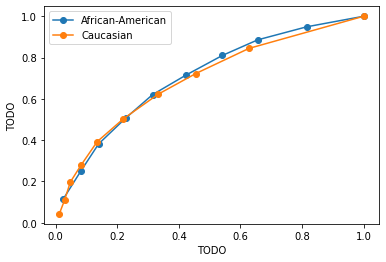

In [108]:
# FILL IN: plot the ROC curve for each race.
plt.figure()

for race in races: 
    rows = summary[summary['race']==race]
    plt.plot(rows['FPR'], rows['TPR'], '-o', label=race) # FILL IN the correct columns to use.
    
plt.legend()
plt.xlabel('TODO') # FILL IN the correct labels for the x axis on an ROC curve.
plt.ylabel('TODO') # FILL IN the correct labels for the y axis on an ROC curve.
plt.show()

## Question 2.E. Equalizing TPR and FPR

Next, find two thresholds (one for black defendants, one for white defendants) such that FPR and TPR are roughly equal for the two groups (say, within 1% of each other).
Note: trivial thresholds of 0 or 11
don’t count. Hint: it may be helpful to look at the ROC curves for each race.

In [115]:
# FILL IN: choose a decision threshold for each race corresponding to a 
# decile_score between 1 and 10 such that the FPR and TPR are 
# roughly equal for the two races.

caucasian_threshold = 5# FILL IN: choose a decision threshold to use for the subset of data with race = Caucasian.
african_american_threshold = 7# FILL IN: choose a decision threshold to use for the subset of data with race = African-American.

thresh = {'Caucasian': caucasian_threshold, 'African-American': african_american_threshold}  

Finally, for the pair of thresholds you have selected above, what is the disparity of PPV across the two groups?

_Double click to write your answer question here. Show your work in code below if applicable._